In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from va_am.utils.functions import hw_pctl, isHW_in_ds
import datetime

# Reading data

array([1.8889008, 1.8999023, 1.9023972, 1.9034958, 1.903801 , 1.9041061,
       1.9042969, 1.904396 , 1.9045029, 1.9045029, 1.9045944, 1.904602 ,
       1.904602 , 1.9045982, 1.9047012, 1.9047012, 1.9045982, 1.9047012,
       1.9046974, 1.9047012, 1.9047012, 1.9047012, 1.9046974, 1.9047012,
       1.9047012, 1.9046974, 1.9048004, 1.9047012, 1.9046974, 1.9047012,
       1.9047012, 1.9047985, 1.9047012, 1.9046993, 1.9048004, 1.9046993,
       1.9047012, 1.9047985, 1.9047012, 1.9046993, 1.9047604, 1.9047298,
       1.9047399, 1.9047303, 1.9047399, 1.904732 , 1.904736 , 1.904732 ,
       1.9047399, 1.9047303, 1.9047399, 1.9047298, 1.9047604, 1.9046993,
       1.9047012, 1.9047985, 1.9047012, 1.9046993, 1.9048004, 1.9046993,
       1.9047012, 1.9047985, 1.9047012, 1.9047012, 1.9046974, 1.9047012,
       1.9048004, 1.9046974, 1.9047012, 1.9047012, 1.9046974, 1.9047012,
       1.9047012, 1.9047012, 1.9046974, 1.9047012, 1.9045982, 1.9047012,
       1.9047012, 1.9045982, 1.904602 , 1.904602 , 

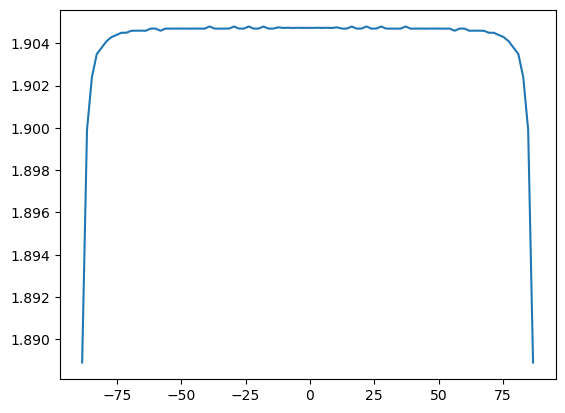

In [5]:
data_dailyMax_t2m_1940_2022 = xr.open_dataset('./data/tmax.day.20crv2c_raw.nc')
# Short data by longitude and latitude
#data_dailyMax_t2m_1940_2022 = data_dailyMax_t2m_1940_2022.sortby(data_dailyMax_t2m_1940_2022.longitude)
#data_dailyMax_t2m_1940_2022 = data_dailyMax_t2m_1940_2022.sortby(data_dailyMax_t2m_1940_2022.latitude)
#data = data_dailyMax_t2m_1940_2022['t2m_dailyMax']
#data = data.sel(latitude=slice(42, 50), longitude=slice(-6,8))
#data = data.mean(dim=['latitude','longitude'])
data = data_dailyMax_t2m_1940_2022.rename({'lon':'longitude', 'lat':'latitude'})
#data.to_netcdf('./data/tmax.day.20crv2c.nc')
data
plt.plot(data.latitude[1:],np.abs(np.diff(data.latitude)), label='latitude')
#np.abs(np.diff(data.longitude))
np.abs(np.diff(data.latitude))

In [55]:
data = xr.open_dataset('./data/data_dailyMax_t2m_1940-2022.nc')
data = data.sortby(data.latitude)
data = data.sortby(data.longitude)

In [56]:
data = data.sel(time=slice('1954-07-01','1954-07-12'),latitude=slice(44,60), longitude=slice(28,48))

In [57]:
data.mean(dim=['latitude','longitude']).t2m_dailyMax.data.max() - 273.15

30.859155273437523

# HW index calculation
## It is based on 

Russo, S., Sillmann, J., & Fischer, E. M. (2015). Top ten European heatwaves since 1950 and their occurrence in the coming decades. Environmental Research Letters, 10(12), 124003.

In [93]:
p90 = hw_pctl(data, [1981, 2010], 90)

In [94]:
#datetime.datetime.strptime(str(years[0]), "%Y-%m-%d")
#p90.sel(dayofyear=slice())
p90

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
    number     int32 ...
    step       timedelta64[ns] ...
    surface    float64 ...
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    pctl_th    (dayofyear) float64 282.8 282.8 282.8 282.8 ... 282.8 282.8 282.1

In [95]:
ds

<xarray.Dataset>
Dimensions:       (time: 62)
Coordinates:
    number        int32 ...
    step          timedelta64[ns] ...
    surface       float64 ...
  * time          (time) datetime64[ns] 2003-07-01 2003-07-02 ... 2003-08-31
    dayofyear     (time) int64 182 183 184 185 186 187 ... 239 240 241 242 243
Data variables:
    t2m_dailyMax  (time) float32 295.1 294.8 294.7 294.9 ... 297.3 296.2 295.4
    isHW          (time) int64 0 0 0 0 0 0 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 0 0 0

In [96]:
data = data.sel(time=slice('2003-07-01','2003-08-31'))
p90 = p90.sel(dayofyear=slice(datetime.datetime.strptime('2003-07-01', "%Y-%m-%d").timetuple().tm_yday,datetime.datetime.strptime('2003-08-31', "%Y-%m-%d").timetuple().tm_yday))
ds = isHW_in_ds(data, p90)

In [97]:
isHW_in_ds(data,p90).isHW.data

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

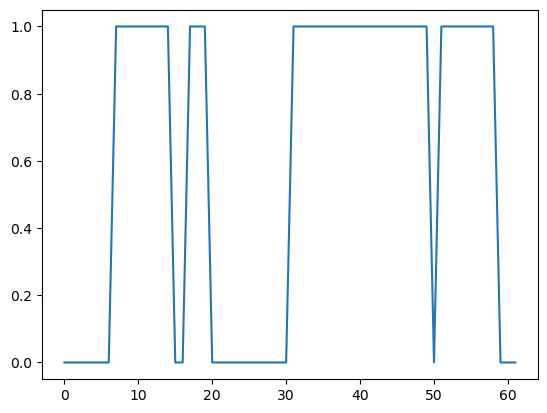

In [98]:
plt.plot(ds.isHW.data)
plt.show()

# Comparing index and tmax

Text(0.5, 1.0, 'France')

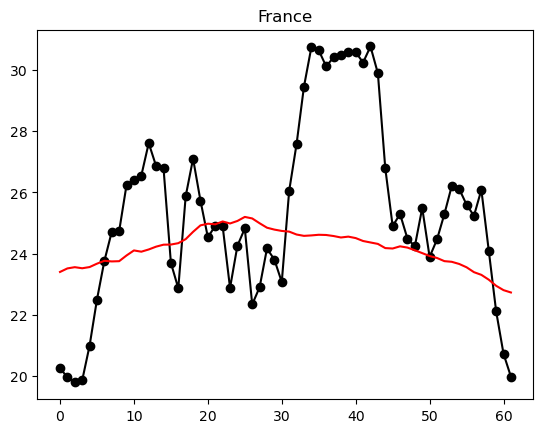

In [99]:
# Paris
#plt.plot(data.sel(time=((data.time.dt.year==2003)), latitude=48.85, longitude=2.35, method='nearest'), color='black', marker='o')
#plt.plot(p90['p90'].sel(latitude=48.85, longitude=2.35, method='nearest'), color='red')
# Francia
#plt.plot(data.sel(time=slice('2003-07-01','2003-08-31'), latitude=slice(42, 50), longitude=slice(-6,8)).mean(dim=['latitude', 'longitude']), color='black', marker='o')
#plt.plot(p90['p90'].sel(dayofyear=slice(181,243), latitude=slice(42, 50), longitude=slice(-6,8)).mean(dim=['latitude', 'longitude']), color='red')
plt.plot(data - 273.15, color='black', marker='o')
plt.plot(p90['pctl_th'] - 273.15, color='red')
plt.title('France')


In [100]:
data

<xarray.DataArray 't2m_dailyMax' (time: 62)>
array([293.40512, 293.10724, 292.93802, 293.00726, 294.1407 , 295.65036,
       296.91046, 297.86484, 297.88513, 299.3958 , 299.57004, 299.7025 ,
       300.7623 , 300.01157, 299.95035, 296.84702, 296.01718, 299.0252 ,
       300.25375, 298.8813 , 297.68585, 298.05695, 298.048  , 296.02856,
       297.40732, 297.972  , 295.48932, 296.0495 , 297.31833, 296.95337,
       296.22144, 299.2024 , 300.73016, 302.60645, 303.89252, 303.79755,
       303.2726 , 303.56256, 303.64957, 303.73172, 303.73434, 303.39703,
       303.92133, 303.04755, 299.9457 , 298.04913, 298.44562, 297.64008,
       297.38693, 298.64194, 297.04086, 297.61404, 298.44418, 299.36627,
       299.26584, 298.75006, 298.38538, 299.23645, 297.2521 , 295.26352,
       293.87494, 293.12762], dtype=float32)
Coordinates:
    number   int32 ...
    step     timedelta64[ns] ...
    surface  float64 ...
  * time     (time) datetime64[ns] 2003-07-01 2003-07-02 ... 2003-08-31

(array([24.,  0., 38.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

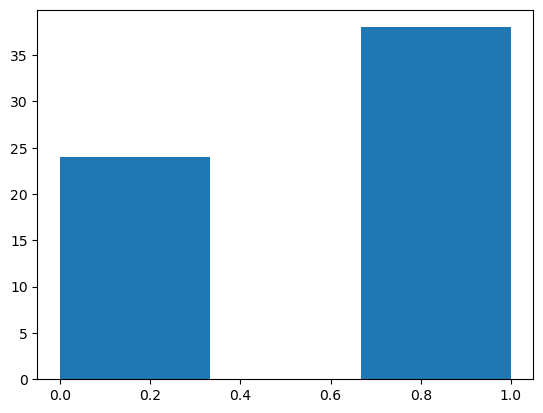

In [101]:
#Paris
plt.hist(ds['isHW'], bins=3)